# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Ravikasha Davva Imawant
- **Email:** ravikasha007@gmail.com
- **ID Dicoding:** imawant

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren jumlah penggunaan sepeda, baik pada:
- rentang waktu bulanan selama tahun 2011-2012, pada bulan apa yang tertinggi dan terendah?
- rentang waktu jam dalam sehari, pukul berapa  yang tertinggi?
- rentang hari dalam seminggu, hari apa yang paling tinggi?


2. Apakah cuaca mempengaruhi penggunaan bikeshare:
- dari keempat jenis variabel "weathersit" mana yang paling rendah mana yang paling tinggi?
- apakah ada korelasi antara keempat indikator cuaca (temp, atemp, humidity, windspeed) dengan jumlah sepeda yang tersewakan?

## Import Semua Packages/Library yang Digunakan

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [31]:
#load dataset
df = pd.read_csv("hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


informasi terkait variabel pada dataset
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month (1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule) - weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
   1: Clear, Few clouds, Partly cloudy, Partly cloudy
   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed in miles per hour. The values are divided to 67 (max)
- casual: count of casual user rides
- registered: count of registered user rides
- cnt: count of total rental bike rides including both casual and registered

### Assessing Data

#### Pengecekan tipe data dari masing masing variabel

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


variabel "dteday" harus diubah menjadi format datetime

variabel "yr" masih dimulai dari 0-1 yang harusnya antara 2011-2012

variabel "month", "season", dan "weekday" masih menggunakan integer, ganti menggunakan string supaya memudahkan untuk memahami (contohnya pada variabel "month" bernilai 1 akan lebih mudah dipahami jika diganti menjadi "Januari")

#### Pengecekan missing values untuk setiap variabel

In [33]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

dapah dilihat dari hasil pengecekan bahwa tidak ada missing value pada semua variabel

#### Pengecekan duplikasi data

In [34]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


dapah dilihat dari hasil pengecekan bahwa tidak ada nilai duplikat pada dataset

#### Statistika deskriptif

In [35]:
df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


dapat dilihat bahwa rentang nilai untuk variabel "temp", "atemp", "hum", dan "windspeed" berada di antara 0-1 yang mana hal tersebut mengindikasikan adanya proses normalisasi kepada keempat variabel tersebut, untuk lebih mendapatkan pemahaman yang menenyeluruh kita bisa ubah menjadi nilai sebenarnya

### Cleaning Data

#### Mengubah tipe data variabel "dteday" menjadi format datetime

In [36]:
df['dteday'] = pd.to_datetime(df['dteday'])
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Mengubah tipe data variabel "weekday", "month", "season" dan "weathersit"

In [37]:
#mengubah variabel "weekday" menjadi nama hari
df['weekday'] = df['dteday'].dt.day_name()

#mengubah variabel "mnth" menjadi nama bulan
df['mnth'] = df['dteday'].dt.month_name()

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [38]:
# mengubah variabel "season" menjadi nama musim
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in df['season']:
    season = find_season(season)
    season_list.append(season)
    
df['season'] = season_list
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Mengubah nilai variabel "yr" sesuai tahun

In [39]:
df['yr'] = df['dteday'].dt.year
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Mengubah nilai variabel "temp", "atemp", "hum", dan "windspeed"

In [40]:
# kalikan semua nliai dengan nilai maksimal dari setiap variabel 
# nilai maks setiap variabel dapat dilihat pada bagian deskripsi variabel pada bagian awal
df['temp'] = df['temp']*41
df['atemp'] = df['atemp']*50
df['hum'] = df['hum']*100
df['windspeed'] = df['windspeed']*67

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


In [41]:
df['hr'] = df['hr'].apply(lambda x: f"0{x}:00" if x < 10 else f"{x}:00")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,00:00,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,01:00,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,02:00,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,03:00,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,04:00,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


In [42]:
df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,24,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Summer,NaN,May,17:00,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,730,NaN,2512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,NaN,0.028770,NaN,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,0.000000,NaN,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,NaN,0.000000,NaN,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,NaN,0.000000,NaN,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,NaN,0.000000,NaN,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,1.000000,NaN,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [43]:
df.to_csv('df_clean.csv', index=False)


## Exploratory Data Analysis (EDA)

#### Histogram

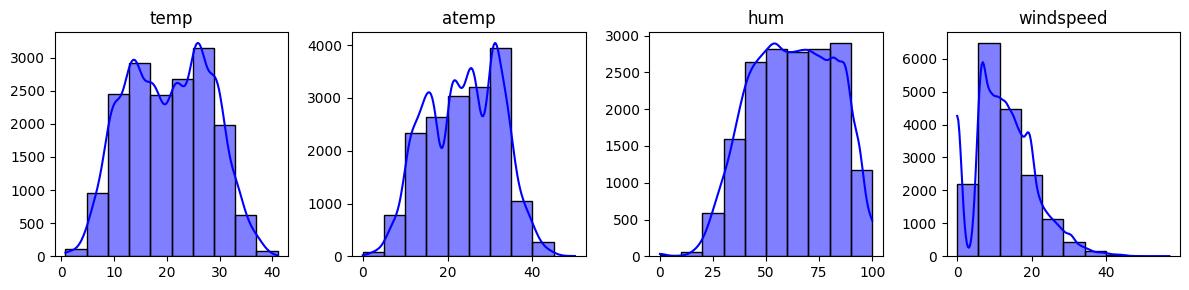

In [44]:
# karena hanya ada 4 variabel yang bertipe data float, 
# maka kita akan membuat histogram untuk keempat variabel tersebut
float_vars = ['temp', 'atemp', 'hum', 'windspeed'] 
df_float = df[float_vars]

# create a figure and 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(12,3))

# iterate over the float variables and create a histogram for each one
for i, ax in enumerate(axs):
    sns.histplot(x=df_float[float_vars[i]], ax=ax, kde=True, bins=10, color='blue')
    
    # set the title and labels
    ax.set_title(float_vars[i])
    ax.set_xlabel("")
    ax.set_ylabel("")
    
# adjust the layout of the subplots
plt.tight_layout()

plt.show()

dapat dilihat dari histogram di atas bahwa kesemua variabel cenderung memiliki distribusi yang tidak normal, terutama yang paling jelas pada variabel "windspeed" karena terlihat dari hasil histogramnya cenderung skewness ke kanan

#### Boxplot 

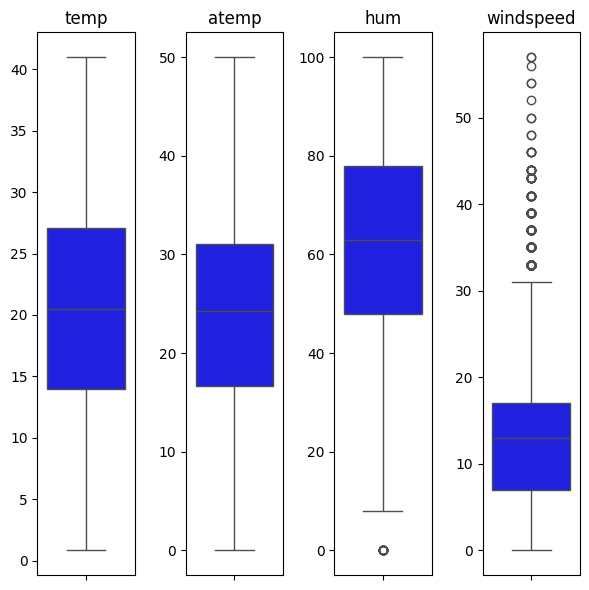

In [45]:
# Create a figure and 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(6, 6))

# Iterate over the float variables and create a boxplot for each one
for i, ax in enumerate(axs):
    sns.boxplot(y=df_float[float_vars[i]], orient='v', ax=ax, color='blue')

    # Set the title and labels
    ax.set_title(float_vars[i])
    ax.set_ylabel("")

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

dari boxplot di atas kita bisa lihat bahwa untuk variabel windspeed ternyata memiliki banyak nilai outlier yang diindikasikan dari adanya titik-titik diluar garis IQR

#### Pivot Table

In [46]:
monthly_users_df = df.resample(rule='ME', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

monthly_users_df.index = monthly_users_df.index.strftime('%b-%y')
monthly_users_df = monthly_users_df.reset_index()
monthly_users_df = monthly_users_df.rename(columns={'dteday': 'yearmonth'})
monthly_users_df

,yearmonth,casual,registered,cnt
0,Jan-11,3073,35116,38189
1,Feb-11,6242,41973,48215
2,Mar-11,12826,51219,64045
3,Apr-11,22346,72524,94870
4,May-11,31050,104771,135821
5,Jun-11,30612,112900,143512
6,Jul-11,36452,104889,141341
7,Aug-11,28842,107849,136691
8,Sep-11,26545,100873,127418
9,Oct-11,25222,98289,123511


In [47]:
weekday_users_df = df.groupby("weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

weekday_users_df = weekday_users_df.reset_index()
weekday_users_df

,weekday,casual,registered,cnt
0,Friday,78238,409552,487790
1,Monday,70784,384719,455503
2,Saturday,153852,323955,477807
3,Sunday,140521,303506,444027
4,Thursday,61460,423935,485395
5,Tuesday,57843,411266,469109
6,Wednesday,57319,415729,473048


In [48]:
weekday_users_df_long = pd.melt(weekday_users_df, id_vars="weekday", var_name="type", value_name="Count of bikeshare rides")
weekday_users_df_long

,weekday,type,Count of bikeshare rides
0,Friday,casual,78238
1,Monday,casual,70784
2,Saturday,casual,153852
3,Sunday,casual,140521
4,Thursday,casual,61460
5,Tuesday,casual,57843
6,Wednesday,casual,57319
7,Friday,registered,409552
8,Monday,registered,384719
9,Saturday,registered,323955


In [49]:
hourly_users_df = df.groupby("hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

hourly_users_df

,casual,registered,cnt
hr,,,
00:00,7375,31755,39130
01:00,4709,19455,24164
02:00,3412,12940,16352
03:00,1893,6281,8174
04:00,874,3554,4428
05:00,1012,13249,14261
06:00,3017,52115,55132
07:00,8037,146134,154171
08:00,15761,245240,261001


In [50]:
seasonly_users_df = df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

seasonly_users_df = seasonly_users_df.reset_index()
seasonly_users_df

,season,casual,registered,cnt
0,Fall,129782,711831,841613
1,Spring,203522,715067,918589
2,Summer,226091,835038,1061129
3,Winter,60622,410726,471348


In [51]:
seasonly_users_df_long = pd.melt(seasonly_users_df, id_vars="season", var_name="type", value_name="Count of bikeshare rides")
seasonly_users_df_long

,season,type,Count of bikeshare rides
0,Fall,casual,129782
1,Spring,casual,203522
2,Summer,casual,226091
3,Winter,casual,60622
4,Fall,registered,711831
5,Spring,registered,715067
6,Summer,registered,835038
7,Winter,registered,410726
8,Fall,cnt,841613
9,Spring,cnt,918589


In [52]:
weather_users_df = df.groupby("weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

weather_users_df = weather_users_df.reset_index()
weather_users_df

,weathersit,casual,registered,cnt
0,1,462745,1875428,2338173
1,2,134481,661471,795952
2,3,22783,135548,158331
3,4,8,215,223


In [53]:
weather_users_df_long = pd.melt(weather_users_df, id_vars="weathersit", var_name="type", value_name="Count of bikeshare rides")
weather_users_df_long

,weathersit,type,Count of bikeshare rides
0,1,casual,462745
1,2,casual,134481
2,3,casual,22783
3,4,casual,8
4,1,registered,1875428
5,2,registered,661471
6,3,registered,135548
7,4,registered,215
8,1,cnt,2338173
9,2,cnt,795952


## Visualization & Explanatory Analysis

### Pertanyaan 1:

1. Bagaimana tren jumlah penggunaan sepeda berdasarkan satuan waktu, baik pada:
- Rentang waktu bulanan selama tahun 2011-2012, pada bulan apa yang tertinggi dan terendah?
- Rentang waktu jam dalam sehari, pukul berapa  yang tertinggi?
- Perbandingan hari dalam seminggu, hari apa yang paling tinggi?

#### Tren bulanan dalam 2 tahun terakhir

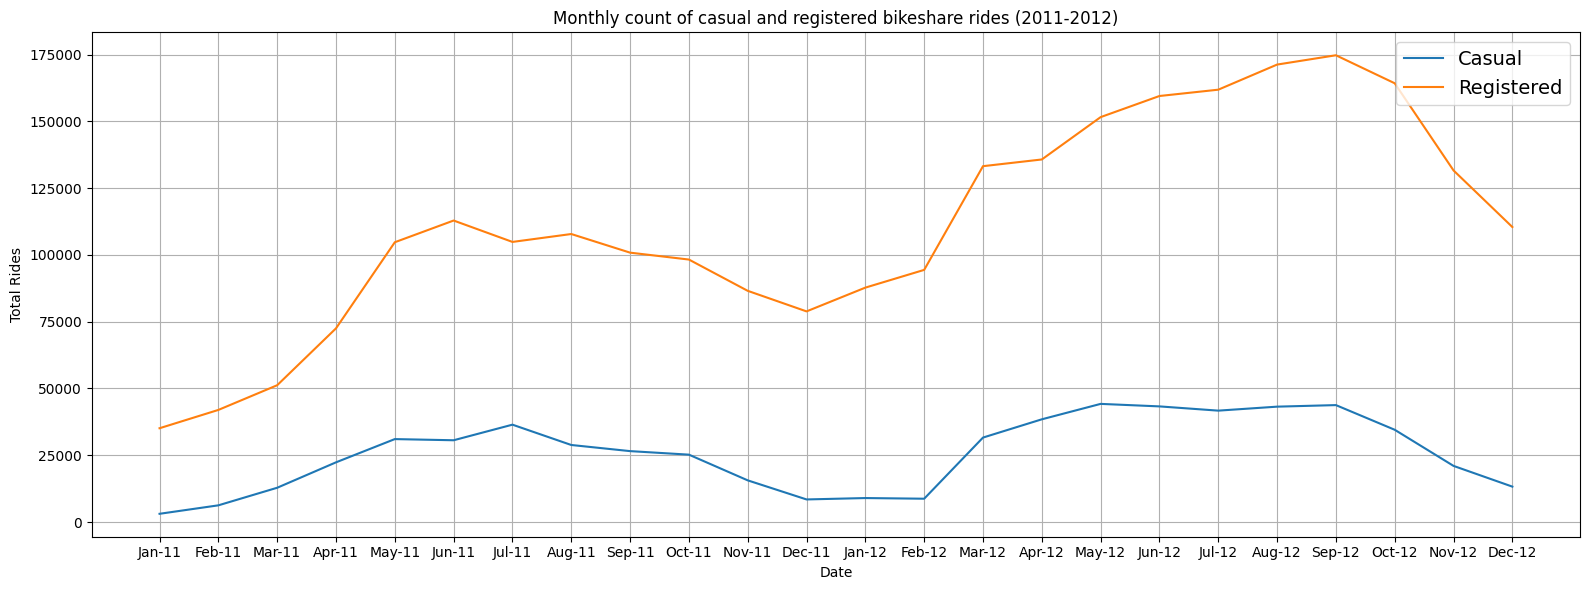

In [54]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="yearmonth", y="casual", data=monthly_users_df, label='Casual')
sns.lineplot(x="yearmonth", y="registered", data=monthly_users_df, label='Registered')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of casual and registered bikeshare rides (2011-2012)")

# Add a legend to the plot
plt.legend(loc='upper right', fontsize=14)

# Add grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

Dapat dilihat dari visualisasi linechart di atas bahwa:
1. Jumlah pengguna cenderung menurun pada bulan November hingga Februari, hal ini mungkin disebabkan oleh cuaca yang kurang mendukung untuk bersepeda sehingga orang lebih memilih untuk menggunakan transportasi lain

2. Juga bisa dilihat bahwa jumlah pengguna yang terdaftar (registered) lebih banyak jika dibandingkan dengan jumlah pengguna yang tidak terdaftar (casual). Akan tetapi, untuk tren penurunan dan kenaikan jumlah pengguna terdaftar dan tidak terdaftar relatif sama


#### Multiple bar chart total sepeda yang tersewa untuk masing-masing hari

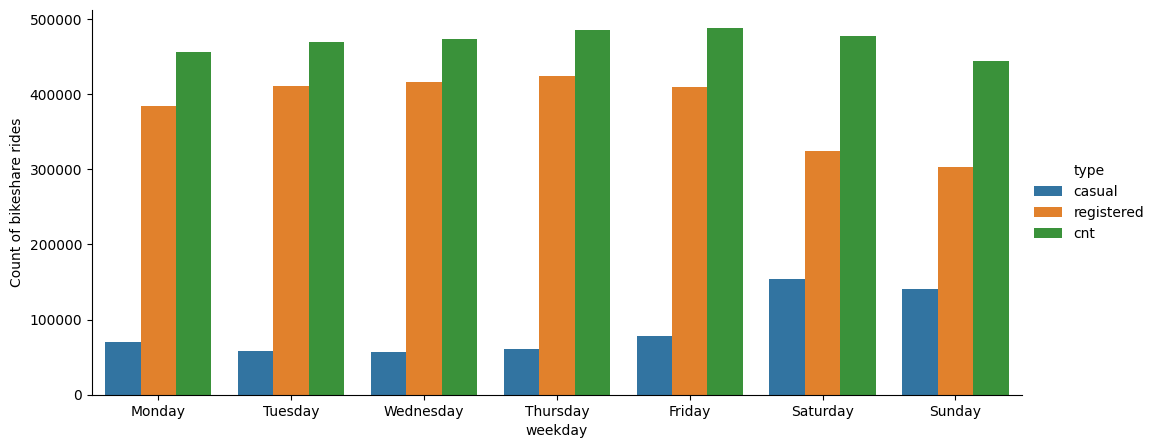

In [55]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# the following code matches the plot produced by catplot
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='weekday', y='Count of bikeshare rides',
                  hue='type', data=weekday_users_df_long, order=day_order)
ax.spines[['top', 'right']].set_visible(False)
sns.move_legend(ax, bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)

Dapat dilihat dari visualisasi multiple bar chart di atas bahwa:
1. Jumlah penyewa bertipe casual lebih tinggi pada hari libur (sabtu dan minggu) dibandingkan dengan hari-hari lainnya
2. Sedangkan jumlah penyewa bertipe registered lebih tinggi pada hari kerja (senin-jumat) dibandingkan dengan hari sabtu dan minggu

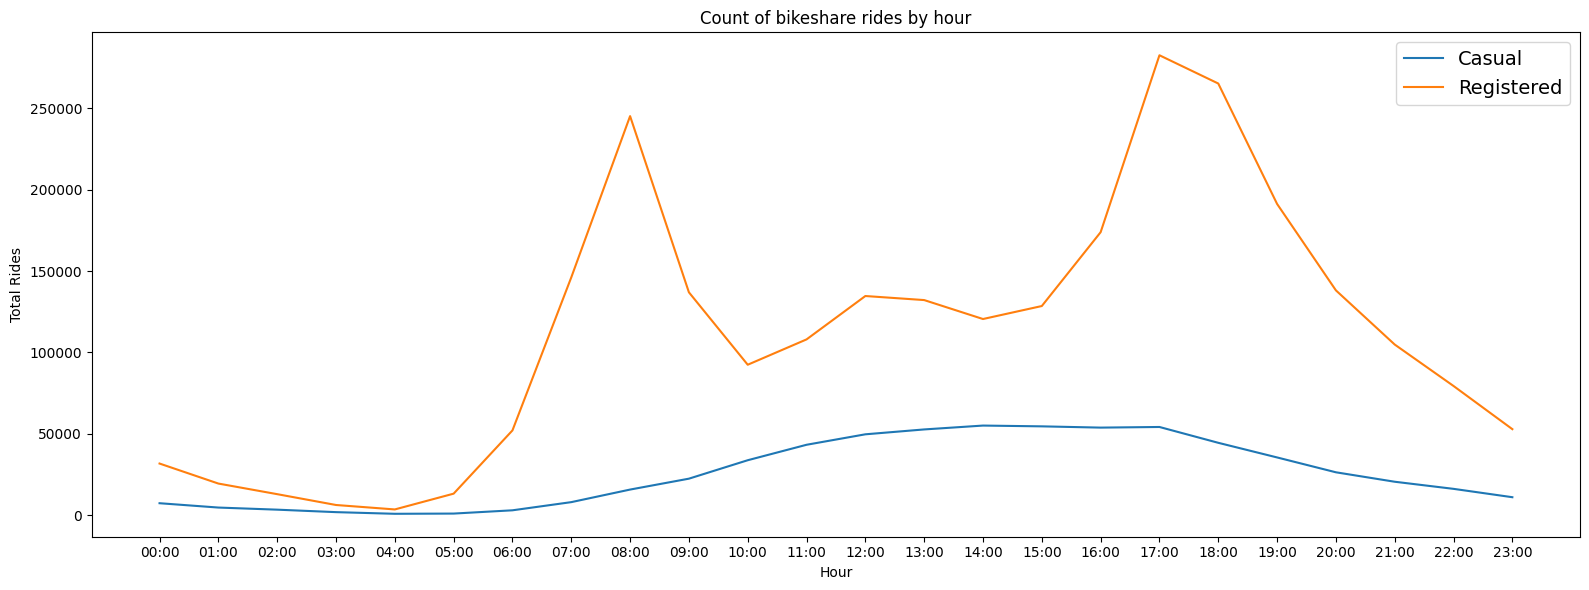

In [56]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="hr", y="casual", data=hourly_users_df, label='Casual')
sns.lineplot(x="hr", y="registered", data=hourly_users_df, label='Registered')

# Add labels and a title to the plot
x = np.arange(0, 24, 1)
plt.xticks(x)

plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by hour")

# Add a legend to the plot
plt.legend(loc='upper right', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Dapat dilihat dari visualisasi linechart di atas, bahwa terjadi kenaikan yang signifikan pada jam 6:00 hingga 8:00 pada tipe pengguna terdaftar (registered) yang kemudian juga terjadi pada jam 16:00 hingga 18:00 hal ini mungkin disebabkan oleh orang yang berangkat dan pulang kerja

Sedangkan untuk tipe pengguna tidak terdaftar (casual), tidak terjadi kenaikan yang signifikan akan tetapi jumlah pengguna mulai meningkat sejak jam 07:00 hingga 17:00 baru kemudian menurun

### Pertanyaan 2:

2. Apakah cuaca mempengaruhi penggunaan bikeshare:
- Dari keempat jenis variabel "weathersit" mana yang paling rendah mana yang paling tinggi?
- Apakah ada korelasi antara keempat indikator cuaca (temp, atemp, humidity, windspeed) dengan jumlah sepeda yang tersewakan?

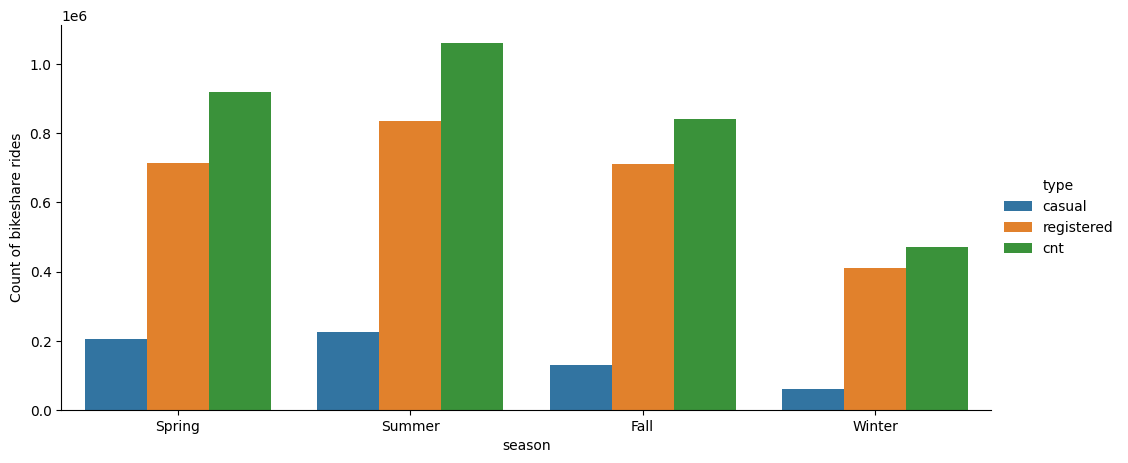

In [57]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

plt.figure(figsize=(12, 5))
ax = sns.barplot(x='season', y='Count of bikeshare rides',
                hue='type', data=seasonly_users_df_long, order=season_order)
ax.spines[['top', 'right']].set_visible(False)
sns.move_legend(ax, bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)

Dapat dilihat dari visualisasi multibar chart di atas, bahwa:
1. Jumlah pengguna cenderung menurun pada musim dingin (winter) baik untuk pengguna terdaftar (registered) maupun tidak terdaftar (casual)
2. Kemudian total penyewaan terbanyak terjadi pada musim panas (summer) baik untuk pengguna terdaftar (registered) maupun tidak terdaftar (casual)

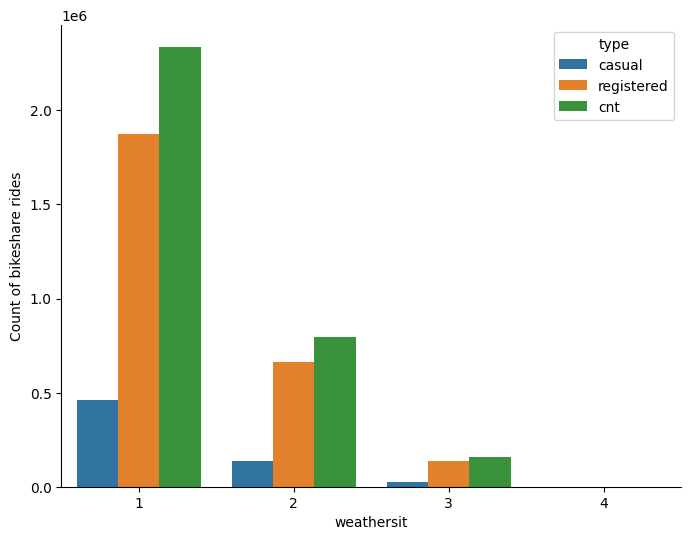

In [58]:
weather_order = [1, 2, 3, 4]

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='weathersit', y='Count of bikeshare rides',
                hue='type', data=weather_users_df_long, order=weather_order)
ax.spines[['top', 'right']].set_visible(False)

Dapat dilihat dari visualisasi multiple bar chart di atas, bahwa
1. Pada cuaca yang cerah (nomor 1), jumlah pengguna casual dan registered lebih banyak
2. Sedangkan pada cuaca yang sangat buruk (nomor 4), jumlah pengguna casual dan registered paling sedikit

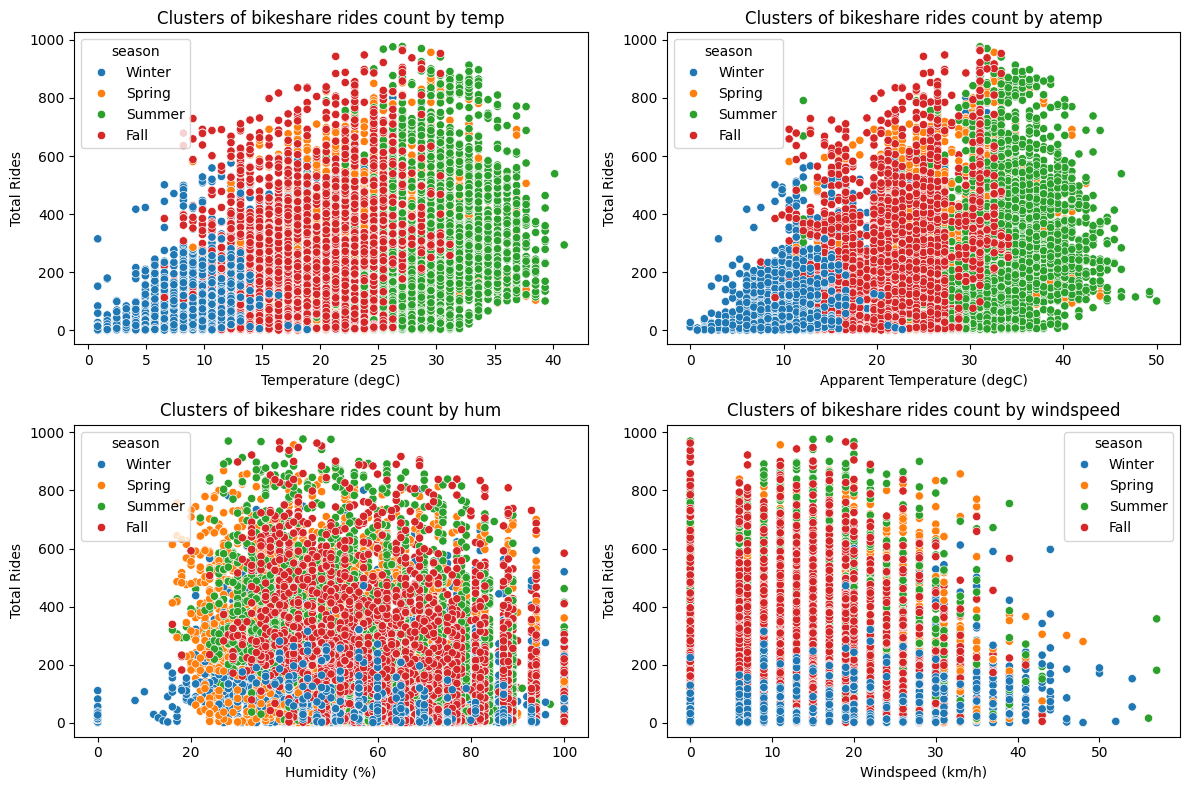

In [59]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot for temp
sns.scatterplot(x='temp', y='cnt', data=df, hue='season', ax=axs[0, 0])
axs[0, 0].set_xlabel("Temperature (degC)")
axs[0, 0].set_ylabel("Total Rides")
axs[0, 0].set_title("Clusters of bikeshare rides count by temp")

# Plot for atemp
sns.scatterplot(x='atemp', y='cnt', data=df, hue='season', ax=axs[0, 1])
axs[0, 1].set_xlabel("Apparent Temperature (degC)")
axs[0, 1].set_ylabel("Total Rides")
axs[0, 1].set_title("Clusters of bikeshare rides count by atemp")

# Plot for hum
sns.scatterplot(x='hum', y='cnt', data=df, hue='season', ax=axs[1, 0])
axs[1, 0].set_xlabel("Humidity (%)")
axs[1, 0].set_ylabel("Total Rides")
axs[1, 0].set_title("Clusters of bikeshare rides count by hum")

# Plot for windspeed
sns.scatterplot(x='windspeed', y='cnt', data=df, hue='season', ax=axs[1, 1])
axs[1, 1].set_xlabel("Windspeed (km/h)")
axs[1, 1].set_ylabel("Total Rides")
axs[1, 1].set_title("Clusters of bikeshare rides count by windspeed")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Dapat dilihat dari scatterplot diatas bahwa:
1. Untuk variabel suhu (temp) seiring dengan peningkatan suhu, jumlah pengguna sepeda meningkat akan tetapi hubungannya tidak linier, hal ini dibuktikan ketika suhu mencapai 30 derajat celcius, jumlah pengguna sepeda tertinggi menurun kembali
2. Untuk variabel suhu terasa (atemp) sama seperti variabel suhu, seiring dengan peningkatan suhu terasa, jumlah pengguna sepeda meningkat akan tetapi hubungannya tidak linier
3. Untuk variabel kelembaban (hum) korelasi antara kelembaban dan jumlah pengguna sepeda tidak terlalu jelas, akan tetapi dapat dilihat bahwa jumlah pengguna sepeda tertinggi terjadi ketika kelembaban berkisar 20-70%
4. Untuk variabel kecepatan angin (windspeed) korelasi antara kecepatan angin dan jumlah pengguna sepeda cukup berbanding terbalik, semakin tinggi kecepatan angin, jumlah penyewa sepeda menurun  

## Conclusion

Conclution pertanyaan 1
1. Bagaimana tren jumlah penggunaan sepeda berdasarkan satuan waktu, baik pada:
- Rentang waktu bulanan selama tahun 2011-2012, pada bulan apa yang tertinggi dan terendah?
- Rentang waktu jam dalam sehari, pukul berapa yang tertinggi?
- Perbandingan hari dalam seminggu, hari apa yang paling tinggi?

Dapat disimpulkan bahwa jumlah pengguna pada bulan-bulan musim panas (Maret-September) lebih banyak dibandingkan dengan musim lainnya terutaama musim dingin (November - Februari) yang mana jumalh penggunanya paling sedikit. Hal ini kemungkinan disebabkan karena pada musim dingin orang-orang cenderung kurang suka berpergian menggunakan sepeda dan memilih transportasi yang lain.

Kemudian untuk jam yang paling sibuk terjadi pada jam 06.00-08.00 dan pukul 16.00-18.00 khusus untuk tipe penyewa registered, sedangkan untuk tipe penyewa casual cenderung stabil dimulai dari 07.00 sampai 17.00 kemudian menurun

Kemudian untuk hari libur (sabtu dan minggu) kebanyakan penyewa berasal dari tipe tidak terdaftar (casual) sedangkan untuk hari-hari kerja (senin-jumat) lebih cenderung didominasi oleh penyewa dengan tipe terdaftar (registered)

Conclution pertanyaan 2
2. Apakah cuaca mempengaruhi penggunaan bikeshare:
- Dari keempat jenis variabel "weathersit" mana yang paling rendah mana yang paling tinggi?
- Apakah ada korelasi antara keempat indikator cuaca (temp, atemp, humidity, windspeed) dengan jumlah sepeda yang tersewakan?

Dapat disimpulkan bahwa cuaca dan musim mempengaruhi total penyewaan sepeda

untuk musim dengan total penyewaan tertinggi terjadi pada musim panas (summer) dan terendah pada musim dingin (winter)

untuk cuaca dari indikasi 0-4 jumlah penyewaan tertinggi terjadi pada indikator cuaca 1 (cuaca terbaik) dan urut menurun sampai yang terendah indikator 4 (cuaca terburuk)